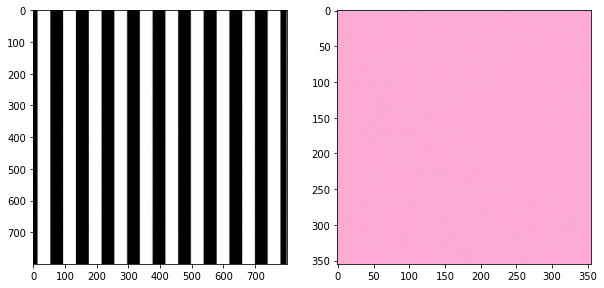

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# read in the image
image_stripes = cv2.imread('images/stripes.jpg')
# CHANGE COLOR TO RGB FROM BGR
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

# read in the image'
image_solid = cv2.imread('images/pink_solid.jpg')
#change color to rgb from bgr
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)



#Display the image
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [3]:
# convert to grayscale to focus on the intensity pattern inthe image
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

# normalize the image color values from a range of [0,255] to [0,1] fro further processing
norm_stripes = gray_stripes / 255.0
norm_solid = gray_solid / 255.0

#perform the fast fourier transform and create a scaled frequency transform image
def ft_image(norm_image):
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20 * np.log(np.abs(fshift))
    
    return frequency_tx

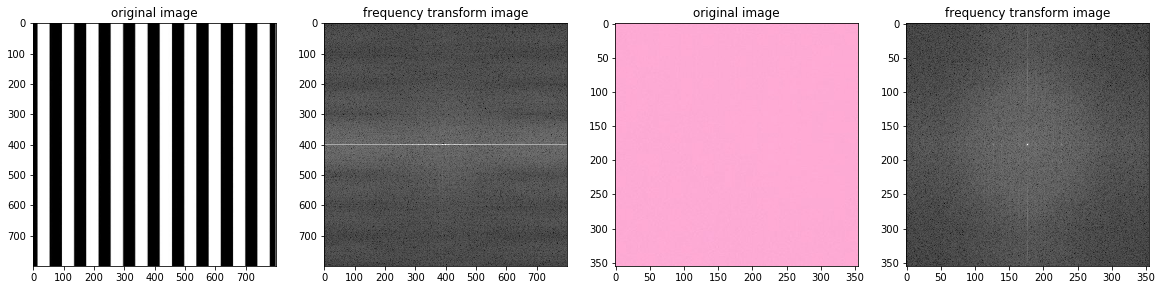

In [4]:
# Call the functin on the normalized image
# and display the transform

f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

#display the image
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))

ax1.set_title('original image')
ax1.imshow(image_stripes)

ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap = 'gray')

ax3.set_title('original image')
ax3.imshow(image_solid)

ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


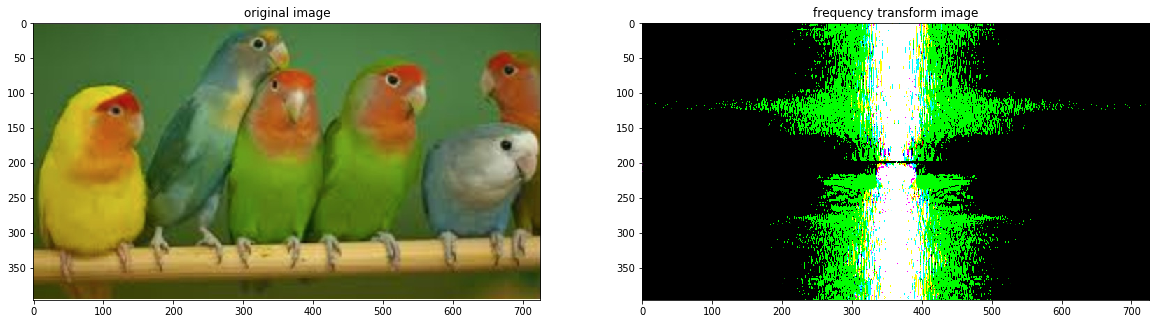

In [7]:
# read in the image
image = cv2.imread('images/birds.jpg')

# change the color from BGR to GRB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#normalize the size
norm_image = image / 255.0

f_image = ft_image(norm_image)

#display the image
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.set_title('original image')
ax1.imshow(image)

ax2.set_title('frequency transform image')
ax2.imshow(f_image)